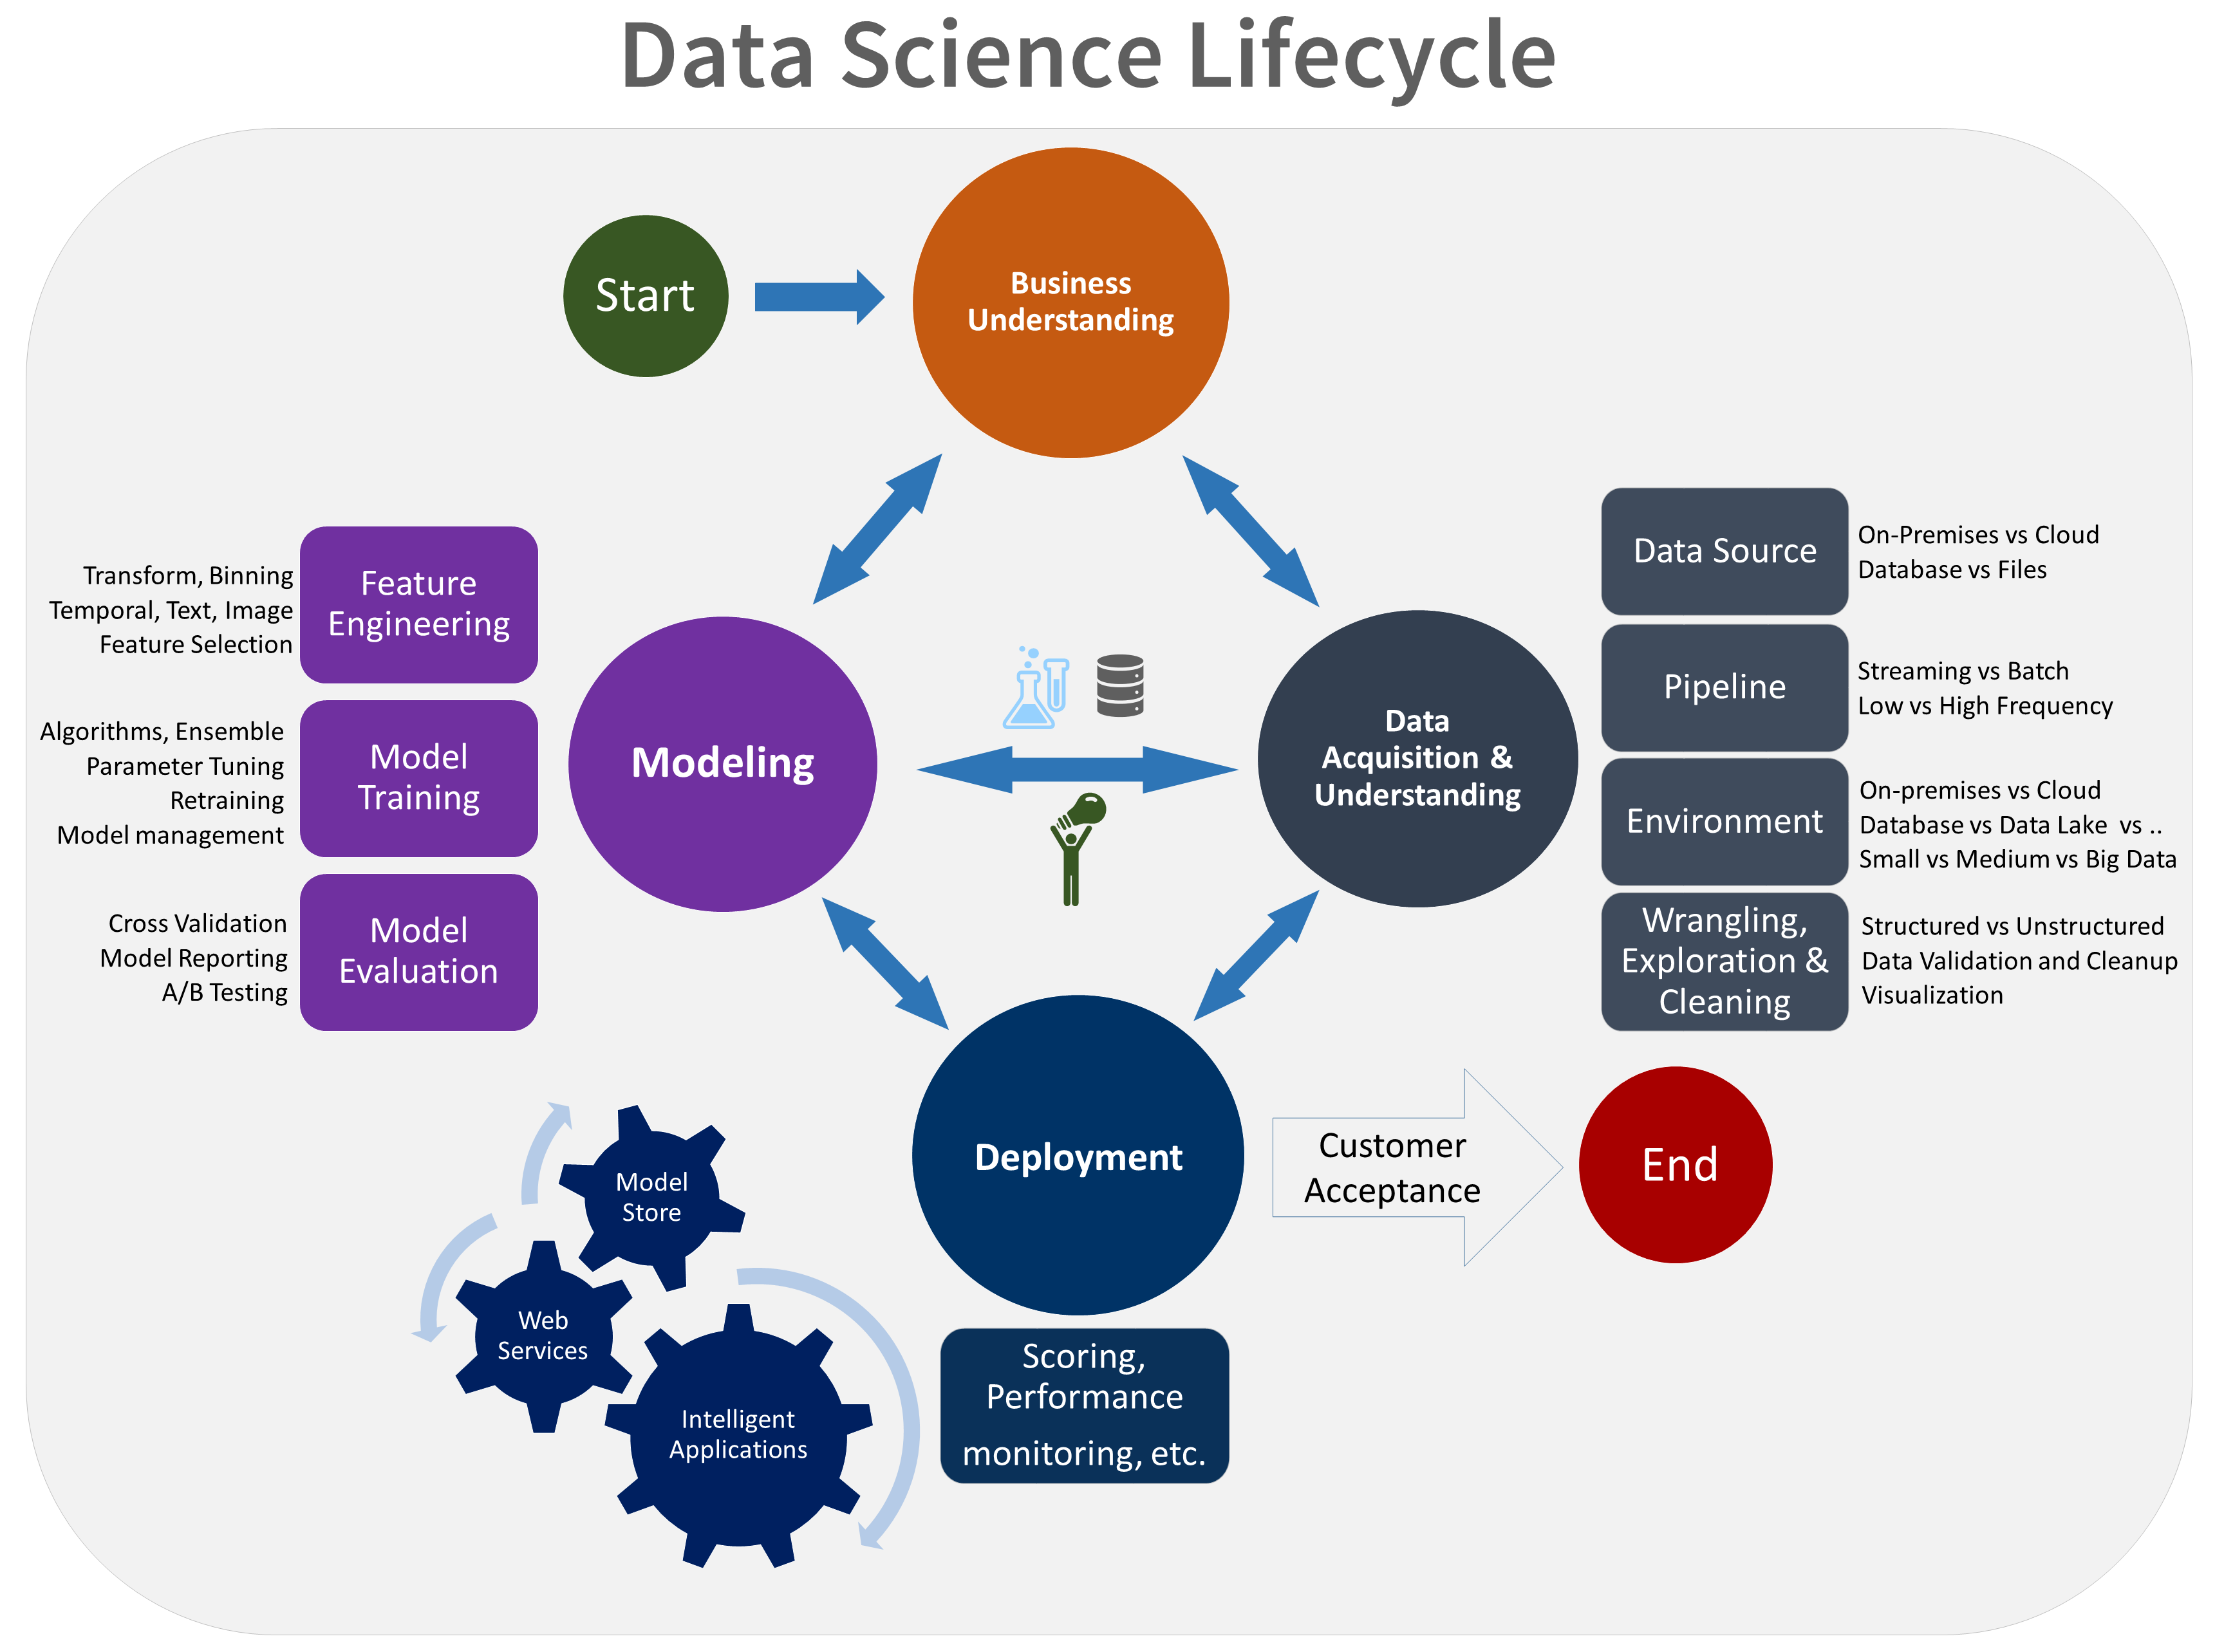

Hier ff kort uitlegje van de workflow

# 1. Probleemstelling en doel
**Probleemstelling:** De Titanic is tijdens vaart gezonken door een botsing met een ijsberg, waarbij 2/3 van de passagiers is omgekomen.

**Doel:** Maak een model die kan voorspellen of een passagier wel of niet de ramp zou overleven (Binaire classificatie)


# 2. Data verzamelen
In het geval van de Titanic challenge is de data vrijgegeven door kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the training data
df = pd.read_csv('train.csv', sep=",")

# 3. Data onderzoeken

In [2]:
print('\n\n************************* Aantal rows in df: *************************')
print("Aantal rows in df =", len(df))

print('\n\n************************* De colommen van df: *************************')
print("De colommen van df = ", df.columns)

print('\n\n************************* Eerst 5 rijen van de data: *************************')
df.head()



************************* Aantal rows in df: *************************
Aantal rows in df = 891


************************* De colommen van df: *************************
De colommen van df =  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


************************* Eerst 5 rijen van de data: *************************


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Conclusies**
* Meerder colommen zijn non-integer waardes en zullen omgevormd moeten worden
* Age heeft missende waardes
* Cabin heeft **veel** missende waardes
* Embarked heeft 2 missende waardes

**Overview van de colommen met betekenis**
* (int)(numerical)           PassengerId
* (int)(target variable)     Survived  Survival (0 = No; 1 = Yes)
* (int)(ordinal categorical) Pclass    Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* (str)(nominal categorical) Name      
* (str)(nominal categorical) Sex       
* (flt)(numerical)           Age      
* (int)(numerical)           SibSp     Number of Siblings/Spouses Aboard
* (int)(numerical)           Parch     Number of Parents/Children Aboard
* (str)(nominal categorical) Ticket    Ticket Number
* (flt)(numerical)           Fare      Passenger Fare (British pound)
* (str)(nominal categorical) Cabin     Cabin (letter of the cabin number indicates the deck)
* (str)(nominal categorical) Embarked  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<AxesSubplot:>

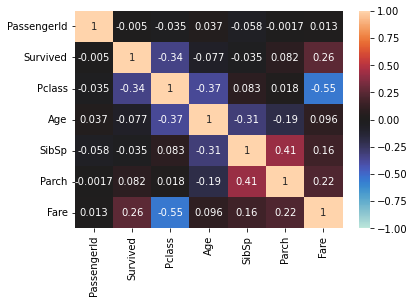

In [4]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)

**Conclusies**
* Pclass en Fare hebben de meeste invloed op de overlevingskans

<AxesSubplot:>

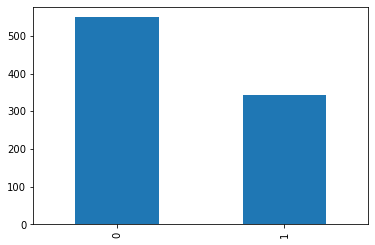

In [5]:
# Om te bekijken hoe onze verdeling eruit ziet van "Survived", 0=Not survive, 1=survived
df['Survived'].value_counts().plot(kind='bar')

# 4 & 5. Data preprocessing & Feature selection

In [6]:
# Feature selection 
# Volgens de datascience workflow komt dit na preprocessing, maar wij vonden het onnodig om colommen te preprocessen als we die toch niet gebruiken
# Wij als projectgroep besloten de volgende colommen weg omdat wij dachten dat deze weinig impact hebben of te veel data miste om nuttig te zijn.
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# NaN values vullen
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna('EM', inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Splits bepaalde features nog op in meerdere colommen, zodat deze 
categorical_features = ['Pclass', 'Sex', 'Embarked']
df = pd.get_dummies(df, columns=categorical_features)
print(df.info)

<bound method DataFrame.info of      Survived   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
0           0  22.0      1      0   7.2500         0         0         1   
1           1  38.0      1      0  71.2833         1         0         0   
2           1  26.0      0      0   7.9250         0         0         1   
3           1  35.0      1      0  53.1000         1         0         0   
4           0  35.0      0      0   8.0500         0         0         1   
..        ...   ...    ...    ...      ...       ...       ...       ...   
886         0  27.0      0      0  13.0000         0         1         0   
887         1  19.0      0      0  30.0000         1         0         0   
888         0  28.0      1      2  23.4500         0         0         1   
889         1  26.0      0      0  30.0000         1         0         0   
890         0  32.0      0      0   7.7500         0         0         1   

     Sex_female  Sex_male  Embarked_C  Embarked_EM  Emb

<AxesSubplot:>

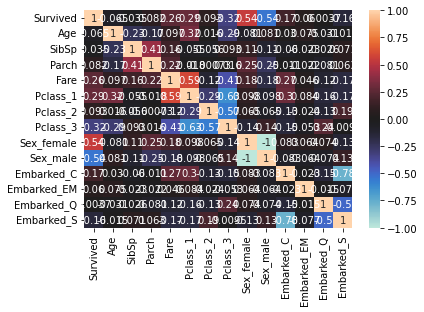

In [7]:
# Opnieuw een heatmap om de impact te zien van de values waar dat eerst niet kon
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)

**Conclusies**
* Male of Female maakt een aanwezig verschil uit voor overlevingskans
* Pclass maakt uit op de extremen, waarbij 1e klasse een hogere overlevingskans heeft, 2de klasse geen verschil en 3de klasse een lagere kans 

Deze conclusies hebben wij getrokken door naar correlaties te kijken. Van 0 tot 0.33 is een zwakke correlatie, 0.33 tot 0.66 is een aanwezige correlatie, 0.66 tot 1 is een sterke correlatie. Positief betekent een hogere overlevingskans, negatief een lagere kans

In [8]:
# Shuffle de data voordat we deze in train en test splitten 
from sklearn.utils import shuffle
df = shuffle(df)

# Splitten van de data
import sklearn
from sklearn.model_selection import train_test_split 
X = df.loc[:, df.columns != "Survived"]
y = df.loc[:, df.columns == "Survived"]

# Normalizeer de data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
             
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=3, stratify=df['Survived']) 

**Versie 2 van de data**

Wij waren ook benieuwd of ons model door te veel features gaat overfitten.
We maken daarom een tweede versie van onze data waar we nog meer features eruit halen die wij denken dat onnodig zijn (gebaseerd op de correlatie met 'Survived'.
Aan het einde van dit notebook zullen de accuracy scores met elkaar worden vergeleken.

In [9]:
# Maak een copie van de df
df2 = df

# Wij hebben voor deze colommen gekozen vanwege de sterke correlatie die we zagen in de heatmap
df2 = df2.drop(columns=['Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_EM',
       'Embarked_Q', 'Embarked_S'])

from sklearn.utils import shuffle
df2 = shuffle(df2)

# Splitten van de data
import sklearn
from sklearn.model_selection import train_test_split 
X2 = df2.loc[:, df2.columns != "Survived"]
y2 = df2.loc[:, df2.columns == "Survived"]

# Normalizeer de data
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(X2)
X2 = scaler2.transform(X2)
             
X_train2, X_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(X2, y2, test_size=0.2) 

# 6. Model training

### 6.1 Logistic Regression

In [10]:
# Voor ons model kiezen wij voor simpele classification
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score

def trainModel(X_train, y_train, X_test):
    regr = linear_model.LogisticRegression()
    model = regr.fit(X_train, y_train)
    pred = model.predict(X_test)
    return pred, model

pred1, model = trainModel(X_train, y_train, X_test)
pred2, model2 = trainModel(X_train2, y_train2, X_test2)

C:\Users\MJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 6.2 Random Forest

In [11]:
# Wij hebben ook ge experimenteerd met het randomforest model om te zien of dit beter resultaat geeft.
from sklearn.ensemble import RandomForestClassifier

def rftrainModel(X_train, y_train, X_test):
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf.predict(X_test)
    return rf.predict(X_test)

rfPred = rftrainModel(X_train, y_train, X_test)


C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/3108572057.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


# 7. Model evaluatie

In [12]:
result = metrics.accuracy_score(y_test, pred1)
print("De accuracy van ons model met alle features:", result)

result2 = metrics.accuracy_score(y_test2, pred2)
print("De accuracy van ons model met alle features:", result2)

result3 = metrics.accuracy_score(y_test, rfPred)
print("De accuracy van ons model trained met randomforest classifier:", result3)


De accuracy van ons model met alle features: 0.8044692737430168
De accuracy van ons model met alle features: 0.7597765363128491
De accuracy van ons model trained met randomforest classifier: 0.8324022346368715


**Conclusie**
Wij hebben getest wat de impact was van het weghalen van de features met lage correlatie. Uiteindlijk blijkt dit verschil minimaal als er wordt gekeken naar de accuracy.

Text(0.5, 1.0, 'Met Alle features')

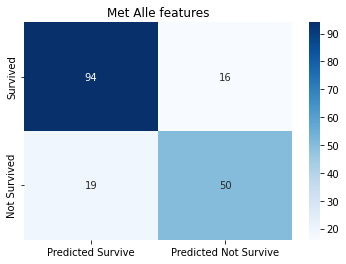

In [13]:
#Get the confusion matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred1)
x_axis_labels = ["Predicted Survive", "Predicted Not Survive"] # labels for x-axis
y_axis_labels = ["Survived", "Not Survived"] # labels for y-axis
sns.heatmap(cf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, cmap='Blues')
plt.title('Met Alle features')

Text(0.5, 1.0, 'Met non-impactvolle features verwijderd')

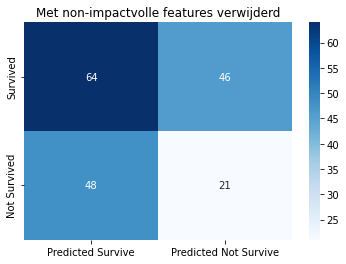

In [14]:
cf_matrix = confusion_matrix(y_test, pred2)
x_axis_labels = ["Predicted Survive", "Predicted Not Survive"] # labels for x-axis
y_axis_labels = ["Survived", "Not Survived"] # labels for y-axis
sns.heatmap(cf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, cmap='Blues')
plt.title('Met non-impactvolle features verwijderd')

**Conclusie**
Aan de confusion matrixes is ook te zien dat er weinig verschil zit.

Text(0.5, 1.0, 'Model getrained op random forestclassifier')

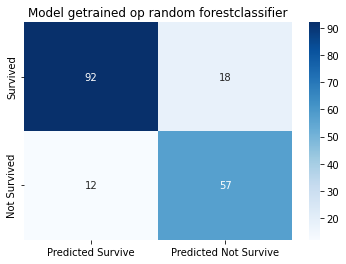

In [15]:
cf_matrix = confusion_matrix(y_test, rfPred)
x_axis_labels = ["Predicted Survive", "Predicted Not Survive"] # labels for x-axis
y_axis_labels = ["Survived", "Not Survived"] # labels for y-axis
sns.heatmap(cf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, cmap='Blues')
plt.title('Model getrained op random forestclassifier')

C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/784892356.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/784892356.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/784892356.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/784892356.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\MJ\

C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/784892356.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/784892356.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/784892356.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/784892356.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\MJ\

C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/784892356.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/784892356.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/784892356.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\MJ\AppData\Local\Temp/ipykernel_25520/784892356.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\MJ\

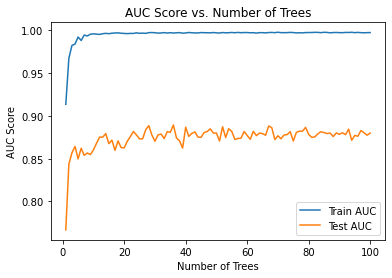

In [16]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Arrays to store AUC scores
train_aucs = []
test_aucs = []
n_trees_range = range(1, 101)  # Adjust the range as needed

for n_trees in n_trees_range:
    clf = RandomForestClassifier(n_estimators=n_trees)
    clf.fit(X_train, y_train)
    
    # Predict and calculate AUC for train set
    train_pred = clf.predict_proba(X_train)[:, 1]
    train_auc = roc_auc_score(y_train, train_pred)
    train_aucs.append(train_auc)
    
    # Predict and calculate AUC for test set
    test_pred = clf.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, test_pred)
    test_aucs.append(test_auc)

# Plotting
plt.plot(n_trees_range, train_aucs, label="Train AUC")
plt.plot(n_trees_range, test_aucs, label="Test AUC")
plt.xlabel('Number of Trees')
plt.ylabel('AUC Score')
plt.legend()
plt.title('AUC Score vs. Number of Trees')
plt.show()

# 8. Deployment (Mijn uitstapje)

## Saving a model

In [17]:
import pickle

# save the classification model as a pickle file
model_pkl_file = "titanic_classifier_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

## Running a saved model

In [18]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# evaluate model 
y_predict = model.predict(X_test)

# check results
result = metrics.accuracy_score(y_test, y_predict)
print("De accuracy van het eerste model na opslaan en opnieuw inladen:", result) 

De accuracy van het eerste model na opslaan en opnieuw inladen: 0.8044692737430168


## Attempt to understand how to scale a row of data for django

In [19]:
# Try to predict for the first regression model, to test out the functionality and see what steps are needed to process input.
print("How it should look: \n", X[-2].reshape(1, -1))
testExistingRow = model.predict(X[-2].reshape(1, -1))
print("Prediction:", testExistingRow)

# Age, SibSp, Parch, Fare, Pclass_1,  Pclass_2,  Pclass_3, sex_female, sex_male, embarked_C, Embarked_EM, Embarked_Q, Embarked_S  
testNewRow = np.array([[54.0, 1, 3, 23.0000, 0, 1, 0, 1, 0, 0, 0, 0, 1]])

# Now all the steps to get the raw row of data 
testNewRow_scaled = scalar.transform(testNewRow)
print("How it looks now: \n", testNewRow_scaled)

testresult = model.predict(testrow_scaled)
print("Prediction:", testresult)

How it should look: 
 [[-1.79533395 -0.4745452   0.76762988 -0.39724143 -0.56568542 -0.51015154
   0.90258736 -0.73769513  0.73769513 -0.48204268 -0.0474312  -0.30756234
   0.61930636]]
Prediction: [0]


NameError: name 'scalar' is not defined